In [74]:
pip install selenium

  Using cached selenium-4.3.0-py3-none-any.whl (981 kB)
  Using cached trio_websocket-0.9.2-py3-none-any.whl (16 kB)
  Using cached trio-0.21.0-py3-none-any.whl (358 kB)
  Using cached async_generator-1.10-py3-none-any.whl (18 kB)
  Using cached outcome-1.2.0-py2.py3-none-any.whl (9.7 kB)
  Using cached wsproto-1.1.0-py3-none-any.whl (24 kB)
  Using cached h11-0.13.0-py3-none-any.whl (58 kB)
Note: you may need to restart the kernel to use updated packages.


In [81]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [135]:
from dotenv import load_dotenv
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [2]:
load_dotenv()

True

In [3]:
google_client_key = os.getenv("Google_API_KEY")

In [167]:
def get_latlng(address_or_zip):
    lat, lng = None, None
    api_key = google_client_key
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    endpoint = f"{base_url}?address={address_or_zip}&key={api_key}"
    r = requests.get(endpoint)
    if r.status_code not in range(200, 299):
        return r.status_code
    try:
        '''
        This try block incase any of our inputs are invalid. 
        This is done instead of actually writing out handlers 
        for all kinds of responses.
        '''
        r.json()
        results = r.json()['results'][0]
        lat = results['geometry']['location']['lat']
        lng = results['geometry']['location']['lng']
    except:
        pass
    return lat,lng

In [329]:
get_latlng("carrer la torreta numero 22 sant carlos de la rapita")

(40.6229743, 0.5858909999999999)

In [169]:
get_latlng("77433")

(29.9643725, -95.7510475)

### Selenium Path

In [160]:
options = Options()
options.add_argument('--headless')
options.add_argument('--disable-gpu') 
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()),options = options)
url_berlin = "https://workaround.io/de/en/search/offices?city=berlin&page=1"
driver.get(url_berlin)
driver.find_element(By.XPATH,'//*[@id="CybotCookiebotDialogBodyLevelButtonAccept"]').click()
driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
import time
time.sleep(3)
html = driver.page_source

<html lang="en"><head>
<title>308 Offices to rent in Berlin | Workaround</title><meta charset="utf-8" data-n-head="ssr"/><meta content="width=device-width, initial-scale=1" data-n-head="ssr" name="viewport"/><meta content="#FFFFFF" data-hid="theme-color" data-n-head="ssr" name="theme-color"/><meta content="viewport-width, width, device-memory, dpr, downlink, ect" data-n-head="ssr" httpequiv="Accept-CH"/><meta content="summary_large_image" data-hid="twitter:card" data-n-head="ssr" name="twitter:card"/><meta content="https://workaround.io/og-image.png" data-hid="twitter:image" data-n-head="ssr" name="twitter:image"/><meta content="https://workaround.io/og-image.png" data-hid="og:image" data-n-head="ssr" property="og:image"/><meta content="https://workaround.io/og-image.png" data-hid="og:image:url" data-n-head="ssr" property="og:image:url"/><meta content="1200" data-hid="og:image:width" data-n-head="ssr" property="og:image:width"/><meta content="630" data-hid="og:image:height" data-n-head
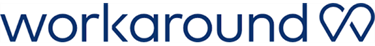

In [161]:
soup = BeautifulSoup(html, "html.parser")
soup

In [162]:
listings = soup.find_all("span",{"ListingCard__title"})
listings

[<span class="ListingCard__title">
                         TOG The Office Group · Unter den Linden 40
                     </span>,
 <span class="ListingCard__title">
                         Mindspace · Kurfürstendamm 207-208
                     </span>]

In [163]:
listings = soup.find_all("section",{"ListingCard"})
len(listings)

2

### Beautifulsoup Path


In [212]:
urlshoe = "https://www.engelvoelkers.com/en/search/?q=&startIndex=0&businessArea=commercial&sortOrder=DESC&sortField=newestProfileCreationTimestamp&pageSize=18&facets=bsnssr%3Acommercial%3Bcntry%3Agermany%3Bdstrct%3Aberlin%3Blcncr%3Amitte%3Blcncr%3Acentre%3Bobjcttyp%3Aoffice%3Brgn%3Aberlin%3Btyp%3Arent%3B"
res = requests.get(urlshoe)
html = res.content
soup = BeautifulSoup(html, "html.parser")
soup


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<!--[if lt IE 9]> <html class="lt-ie9" lang="en" > <![endif]-->
<!--[if IE 9]> <html class="ie9" lang="en" > <![endif]-->
<!--[if gt IE 9]><!--> <html lang="en" xmlns="http://www.w3.org/1999/xhtml"> <!--<![endif]-->
<head> <title>Your Search Results for Residential, Commercial Properties and Yachts - Engel &amp; Völkers</title> <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/> <meta content="telephone=no" name="format-detection"/> <meta content="noindex, follow" name="robots"> <meta content="yes" name="apple-mobile-web-app-capable"/> <meta content="width=device-width,initial-scale=1" name="viewport"/> <link href="/webinnovation-frontend-resources/images/tablet/icon.png" rel="apple-touch-icon"/> <link href="/webinnovation-frontend-resources/images/favicon.ico" rel="shortcut icon" type="image/x-icon"/> <link href="https://www.engelvoelkers.com/en/

In [213]:
listings = soup.find_all("div",{"class":"ev-teaser-subtitle"})

In [254]:
area = soup.select("span.ev-teaser-attribute-value")

In [230]:
location = soup.select("div.ev-teaser-title")

In [215]:
price = soup.select("div.ev-value")

In [216]:
method = soup.select("div.ev-label")

In [217]:
all_listings = [element.getText().strip() for element in listings]
 

In [255]:
all_area = [float(element.getText().strip().strip(" m²").replace(",","")) for element in area]

In [257]:
all_area2 = all_area[::2]

In [248]:
all_price = [float(element.getText().strip().strip(" EUR").replace("(On Request)","0").replace(",",".")) for element in price]

In [220]:
all_method = [element.getText().strip() for element in method]

In [231]:
all_locations = [element.getText().strip() for element in location]

In [265]:
all = {
    "Location":all_locations,
    "City":all_listings,
    "Area" : all_area2,
    "Price":all_price,
    "Method":all_method
}

In [266]:
Listings_mitte = pd.DataFrame(all)

In [268]:
Listings_mitte["Total"] = Listings_mitte["Area"] *Listings_mitte["Price"] 

In [269]:
Listings_mitte

,Location,City,Area,Price,Method,Total
0,"Einfach ""Bond"" – zentral & optimal","Germany, Berlin, BERLIN, Mitte",335.00,35.0,Rent/m² from,11725.000
1,Perfekter Bürostandort in Mitte,"Germany, Berlin, BERLIN, Mitte",878.00,0.0,Price,0.000
2,Erstklassige Lage in Mitte: Top-Büro mit Terrasse,"Germany, Berlin, BERLIN, Mitte",231.72,32.0,Rent/m² from,7415.040
3,Sie suchen ein Büro in Mitte?,"Germany, Berlin, BERLIN, Mitte",430.00,29.0,Rent/m² from,12470.000
4,Souterrain sucht Mieter!,"Germany, Berlin, BERLIN, Mitte",344.00,33.5,Rent/m² from,11524.000
5,"Modernes Büro im Areal ""Forum Museumsinsel"" zu...","Germany, Berlin, BERLIN, Mitte",477.00,35.0,Rent/m² from,16695.000
6,Hier in Mitte,"Germany, Berlin, BERLIN, Mitte",543.35,26.5,Rent/m² from,14398.775
7,Neubau-Erstbezug: Hochwertige Büros in Top-Lag...,"Germany, Berlin, BERLIN, Mitte",5340.00,0.0,Price,0.000
8,Neues Büro in zentraler Lage,"Germany, Berlin, BERLIN, Mitte",126.00,35.0,Rent/m² from,4410.000
9,Stilvolles Büro in Mitte,"Germany, Berlin, BERLIN, Mitte",148.00,28.0,Rent/m² from,4144.000


In [272]:
list_=[]
for i in Listings_mitte["Location"]:
    test = get_latlng(i)
    list_.append(test)

In [304]:
lat=[]
lon=[]
for i in range(len(list_)):
    lat1 = list_[i][0]
    lon1 = list_[i][1]
    lat.append(lat1)
    lon.append(lon1)

In [305]:
all2 = {
    "Location":all_locations,
    "City":all_listings,
    "Area" : all_area2,
    "Price":all_price,
    "Method":all_method,
    "Lat":lat,
    "Long":lon
}

In [306]:
len(lon)

16

In [307]:
Listings_mitte = pd.DataFrame(all2)

In [309]:
Listings_mitte.head(3)

,Location,City,Area,Price,Method,Lat,Long
0,"Einfach ""Bond"" – zentral & optimal","Germany, Berlin, BERLIN, Mitte",335.00,35.0,Rent/m² from,NaN,NaN
1,Perfekter Bürostandort in Mitte,"Germany, Berlin, BERLIN, Mitte",878.00,0.0,Price,52.537290,13.360274
2,Erstklassige Lage in Mitte: Top-Büro mit Terrasse,"Germany, Berlin, BERLIN, Mitte",231.72,32.0,Rent/m² from,51.716406,8.747564


In [310]:
Listings_mitte["Total"] = Listings_mitte["Area"] *Listings_mitte["Price"] 

In [311]:
Listings_mitte.head(3)

,Location,City,Area,Price,Method,Lat,Long,Total
0,"Einfach ""Bond"" – zentral & optimal","Germany, Berlin, BERLIN, Mitte",335.00,35.0,Rent/m² from,NaN,NaN,11725.00
1,Perfekter Bürostandort in Mitte,"Germany, Berlin, BERLIN, Mitte",878.00,0.0,Price,52.537290,13.360274,0.00
2,Erstklassige Lage in Mitte: Top-Büro mit Terrasse,"Germany, Berlin, BERLIN, Mitte",231.72,32.0,Rent/m² from,51.716406,8.747564,7415.04


In [312]:
len(Listings_mitte)

16

In [313]:
Listings_mitte.isna().sum()

Location    0
City        0
Area        0
Price       0
Method      0
Lat         6
Long        6
Total       0
dtype: int64

In [314]:
Listings_mitte

,Location,City,Area,Price,Method,Lat,Long,Total
0,"Einfach ""Bond"" – zentral & optimal","Germany, Berlin, BERLIN, Mitte",335.00,35.0,Rent/m² from,NaN,NaN,11725.000
1,Perfekter Bürostandort in Mitte,"Germany, Berlin, BERLIN, Mitte",878.00,0.0,Price,52.537290,13.360274,0.000
2,Erstklassige Lage in Mitte: Top-Büro mit Terrasse,"Germany, Berlin, BERLIN, Mitte",231.72,32.0,Rent/m² from,51.716406,8.747564,7415.040
3,Sie suchen ein Büro in Mitte?,"Germany, Berlin, BERLIN, Mitte",430.00,29.0,Rent/m² from,52.537290,13.360274,12470.000
4,Souterrain sucht Mieter!,"Germany, Berlin, BERLIN, Mitte",344.00,33.5,Rent/m² from,NaN,NaN,11524.000
5,"Modernes Büro im Areal ""Forum Museumsinsel"" zu...","Germany, Berlin, BERLIN, Mitte",477.00,35.0,Rent/m² from,52.516933,13.401900,16695.000
6,Hier in Mitte,"Germany, Berlin, BERLIN, Mitte",543.35,26.5,Rent/m² from,52.537290,13.360274,14398.775
7,Neubau-Erstbezug: Hochwertige Büros in Top-Lag...,"Germany, Berlin, BERLIN, Mitte",5340.00,0.0,Price,52.521981,13.413306,0.000
8,Neues Büro in zentraler Lage,"Germany, Berlin, BERLIN, Mitte",126.00,35.0,Rent/m² from,NaN,NaN,4410.000
9,Stilvolles Büro in Mitte,"Germany, Berlin, BERLIN, Mitte",148.00,28.0,Rent/m² from,52.537290,13.360274,4144.000


In [317]:
final_listing = Listings_mitte.dropna(axis=0)

In [318]:
len(final_listing)

10

In [328]:
final_listing.to_csv(".\\Input\\finallisting.csv")

In [322]:
pwd

'C:\\Users\\Edgard_Cuadra\\OneDrive\\Desktop\\Ironhack\\Projects\\Project-III-Geospatial'